In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.set_figure_params(dpi=600, frameon=False)
sc.set_figure_params(dpi=600)

def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')
    
%load_ext autoreload
%autoreload 2

In [2]:
result_df = pd.read_csv('../data/polie_sample_uncertainty_tradeoff.csv', index_col=0)

In [11]:
palette_dict = {
    'scPoli': '#6b00b3',
    'scPoli - kNN': '#ff6600',
    'scArches - scANVI': '#85C1E9',
}
map_dict = {
    'PoLIE': 'scPoli',
    'PoLIE - KNN': 'scPoli - kNN',
    'scArches - scANVI': 'scArches - scANVI',
}

In [9]:
result_df['Method'] = result_df['Method'].map(map_dict)

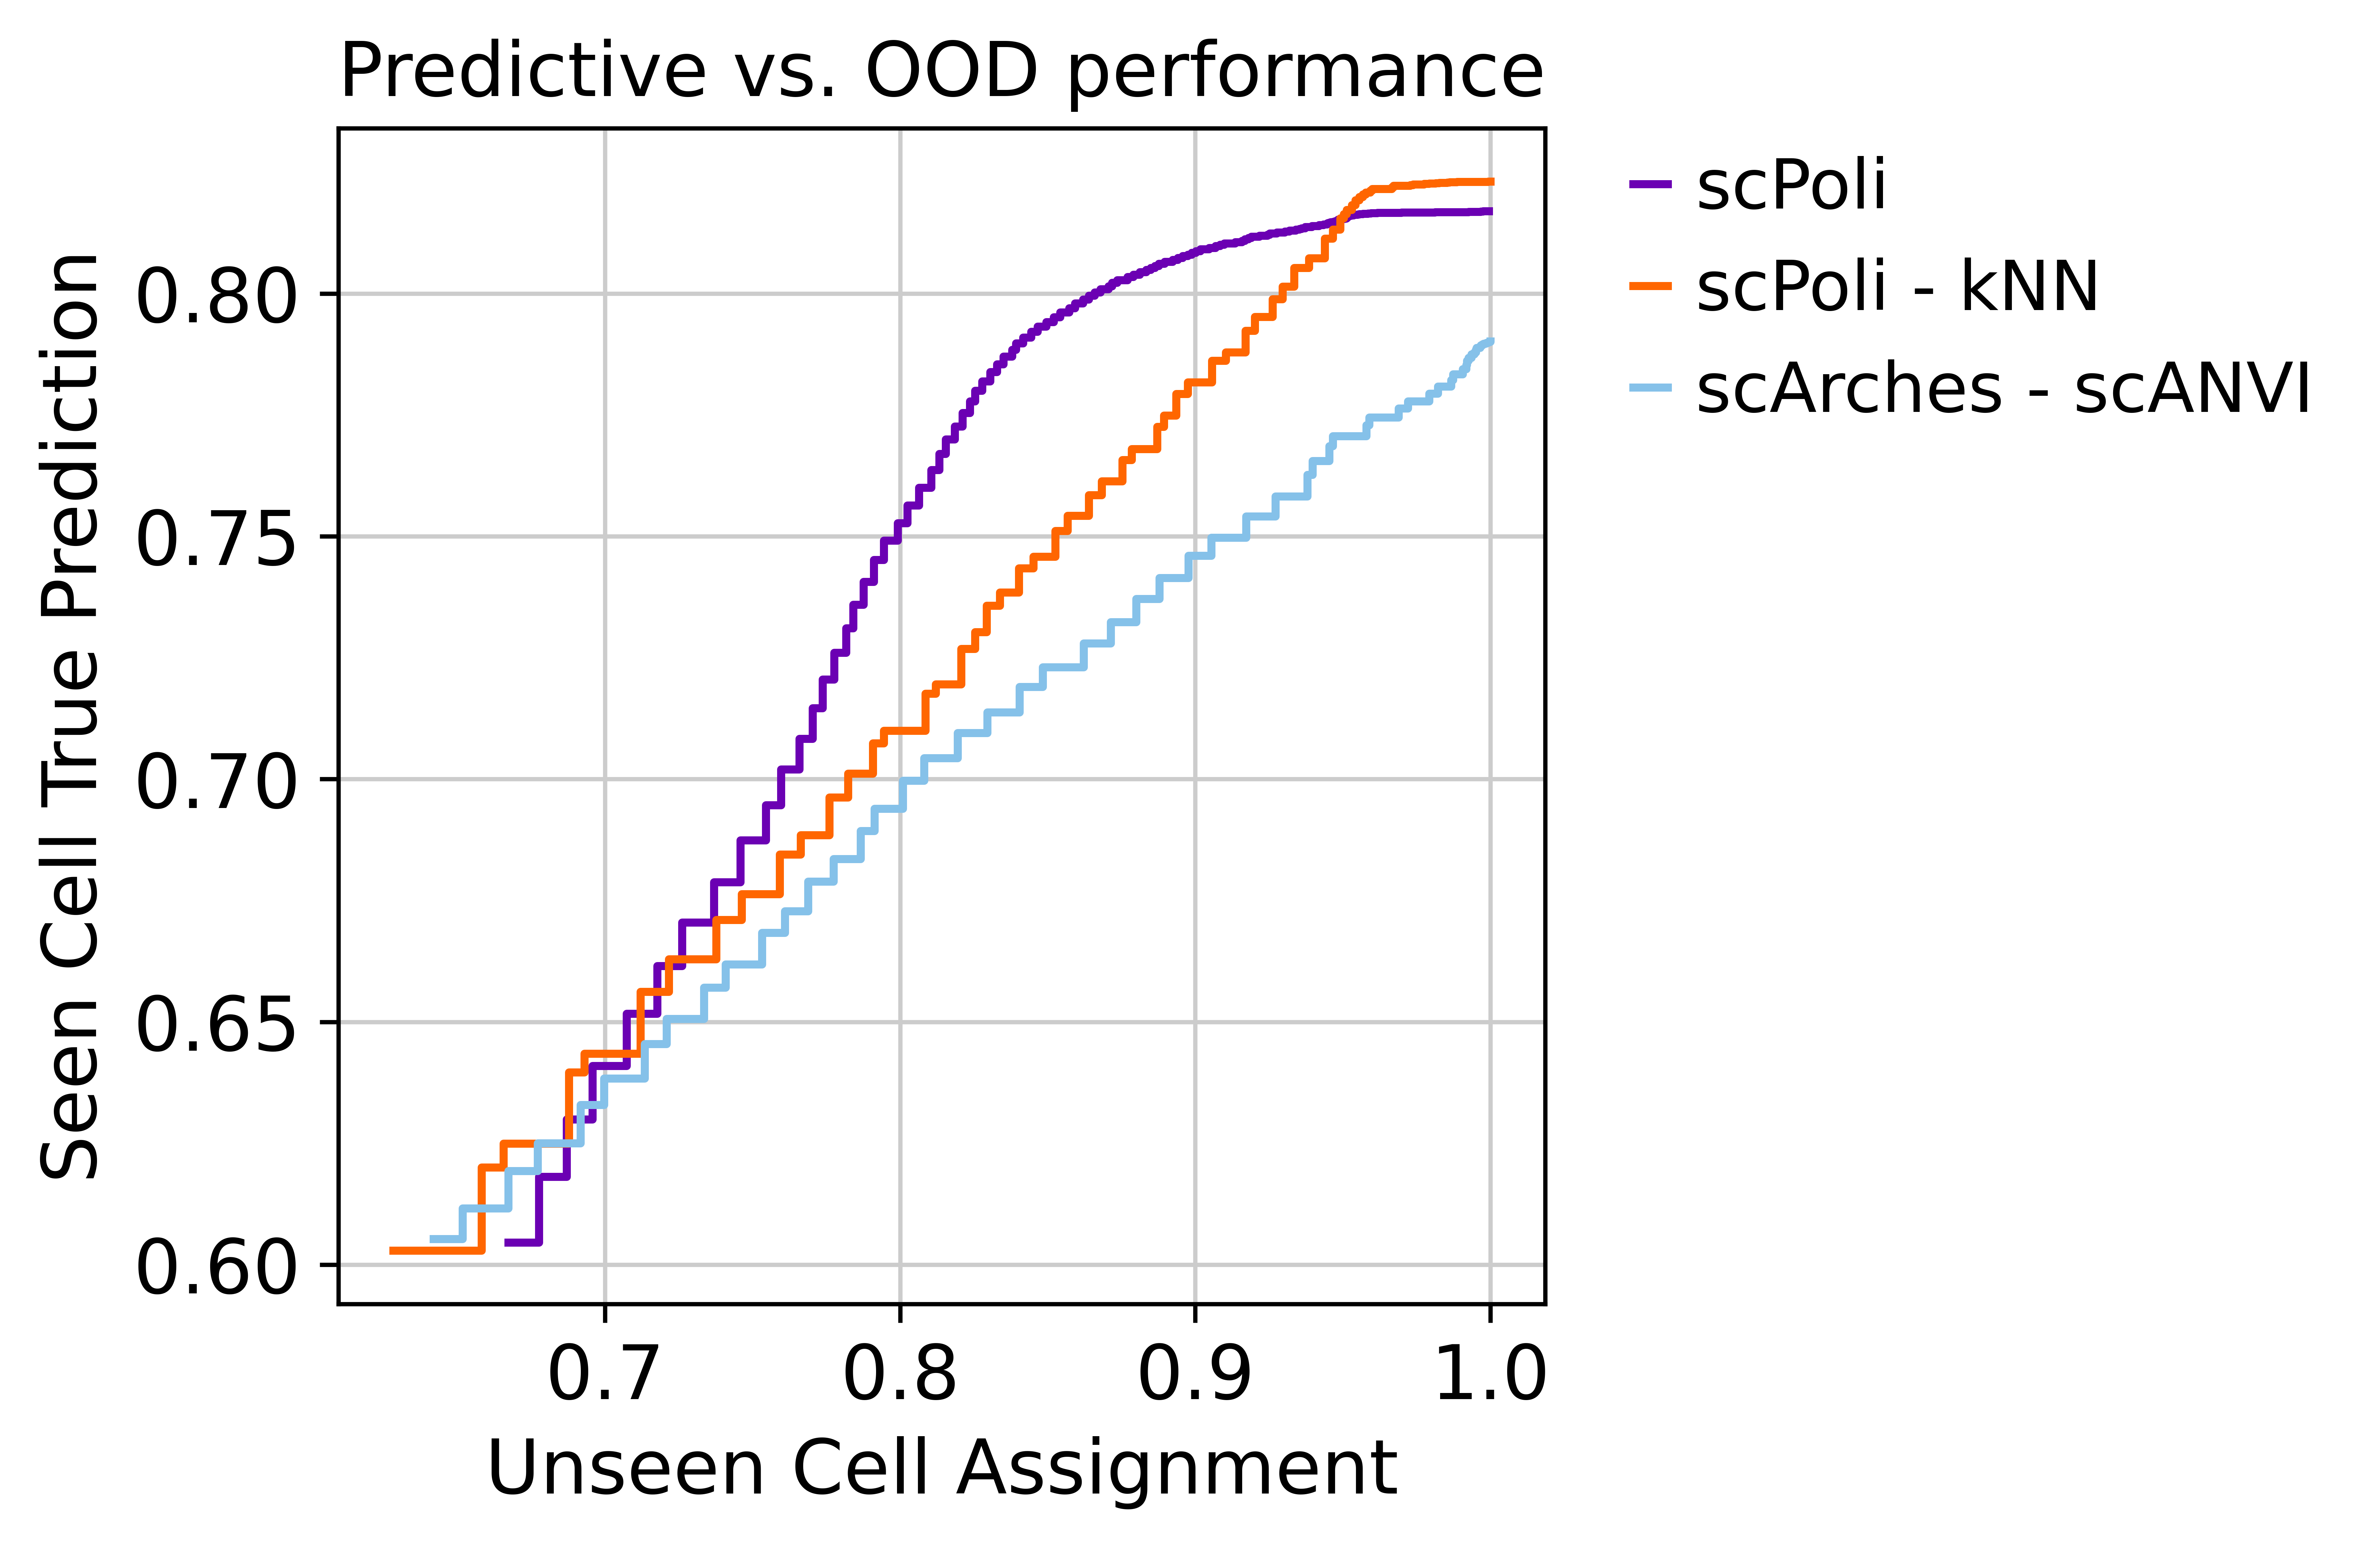

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sns.lineplot(
    x='Unseen Cell Assignment', 
    y='Seen Cell True Prediction', 
    hue='Method', 
    palette=palette_dict,
    data=result_df[result_df['Seen Cell True Prediction'] > 0.60], 
    drawstyle='steps-post', 
    ax=ax,
)
#l = ax.get_xticklabels()
ax.set_title('Predictive vs. OOD performance')
#ax.set_xticklabels(l, rotation=90)
ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

In [19]:
label_transfer_all = pd.read_csv('../data/lataq_sample_barplot_comparison.csv', index_col=0)

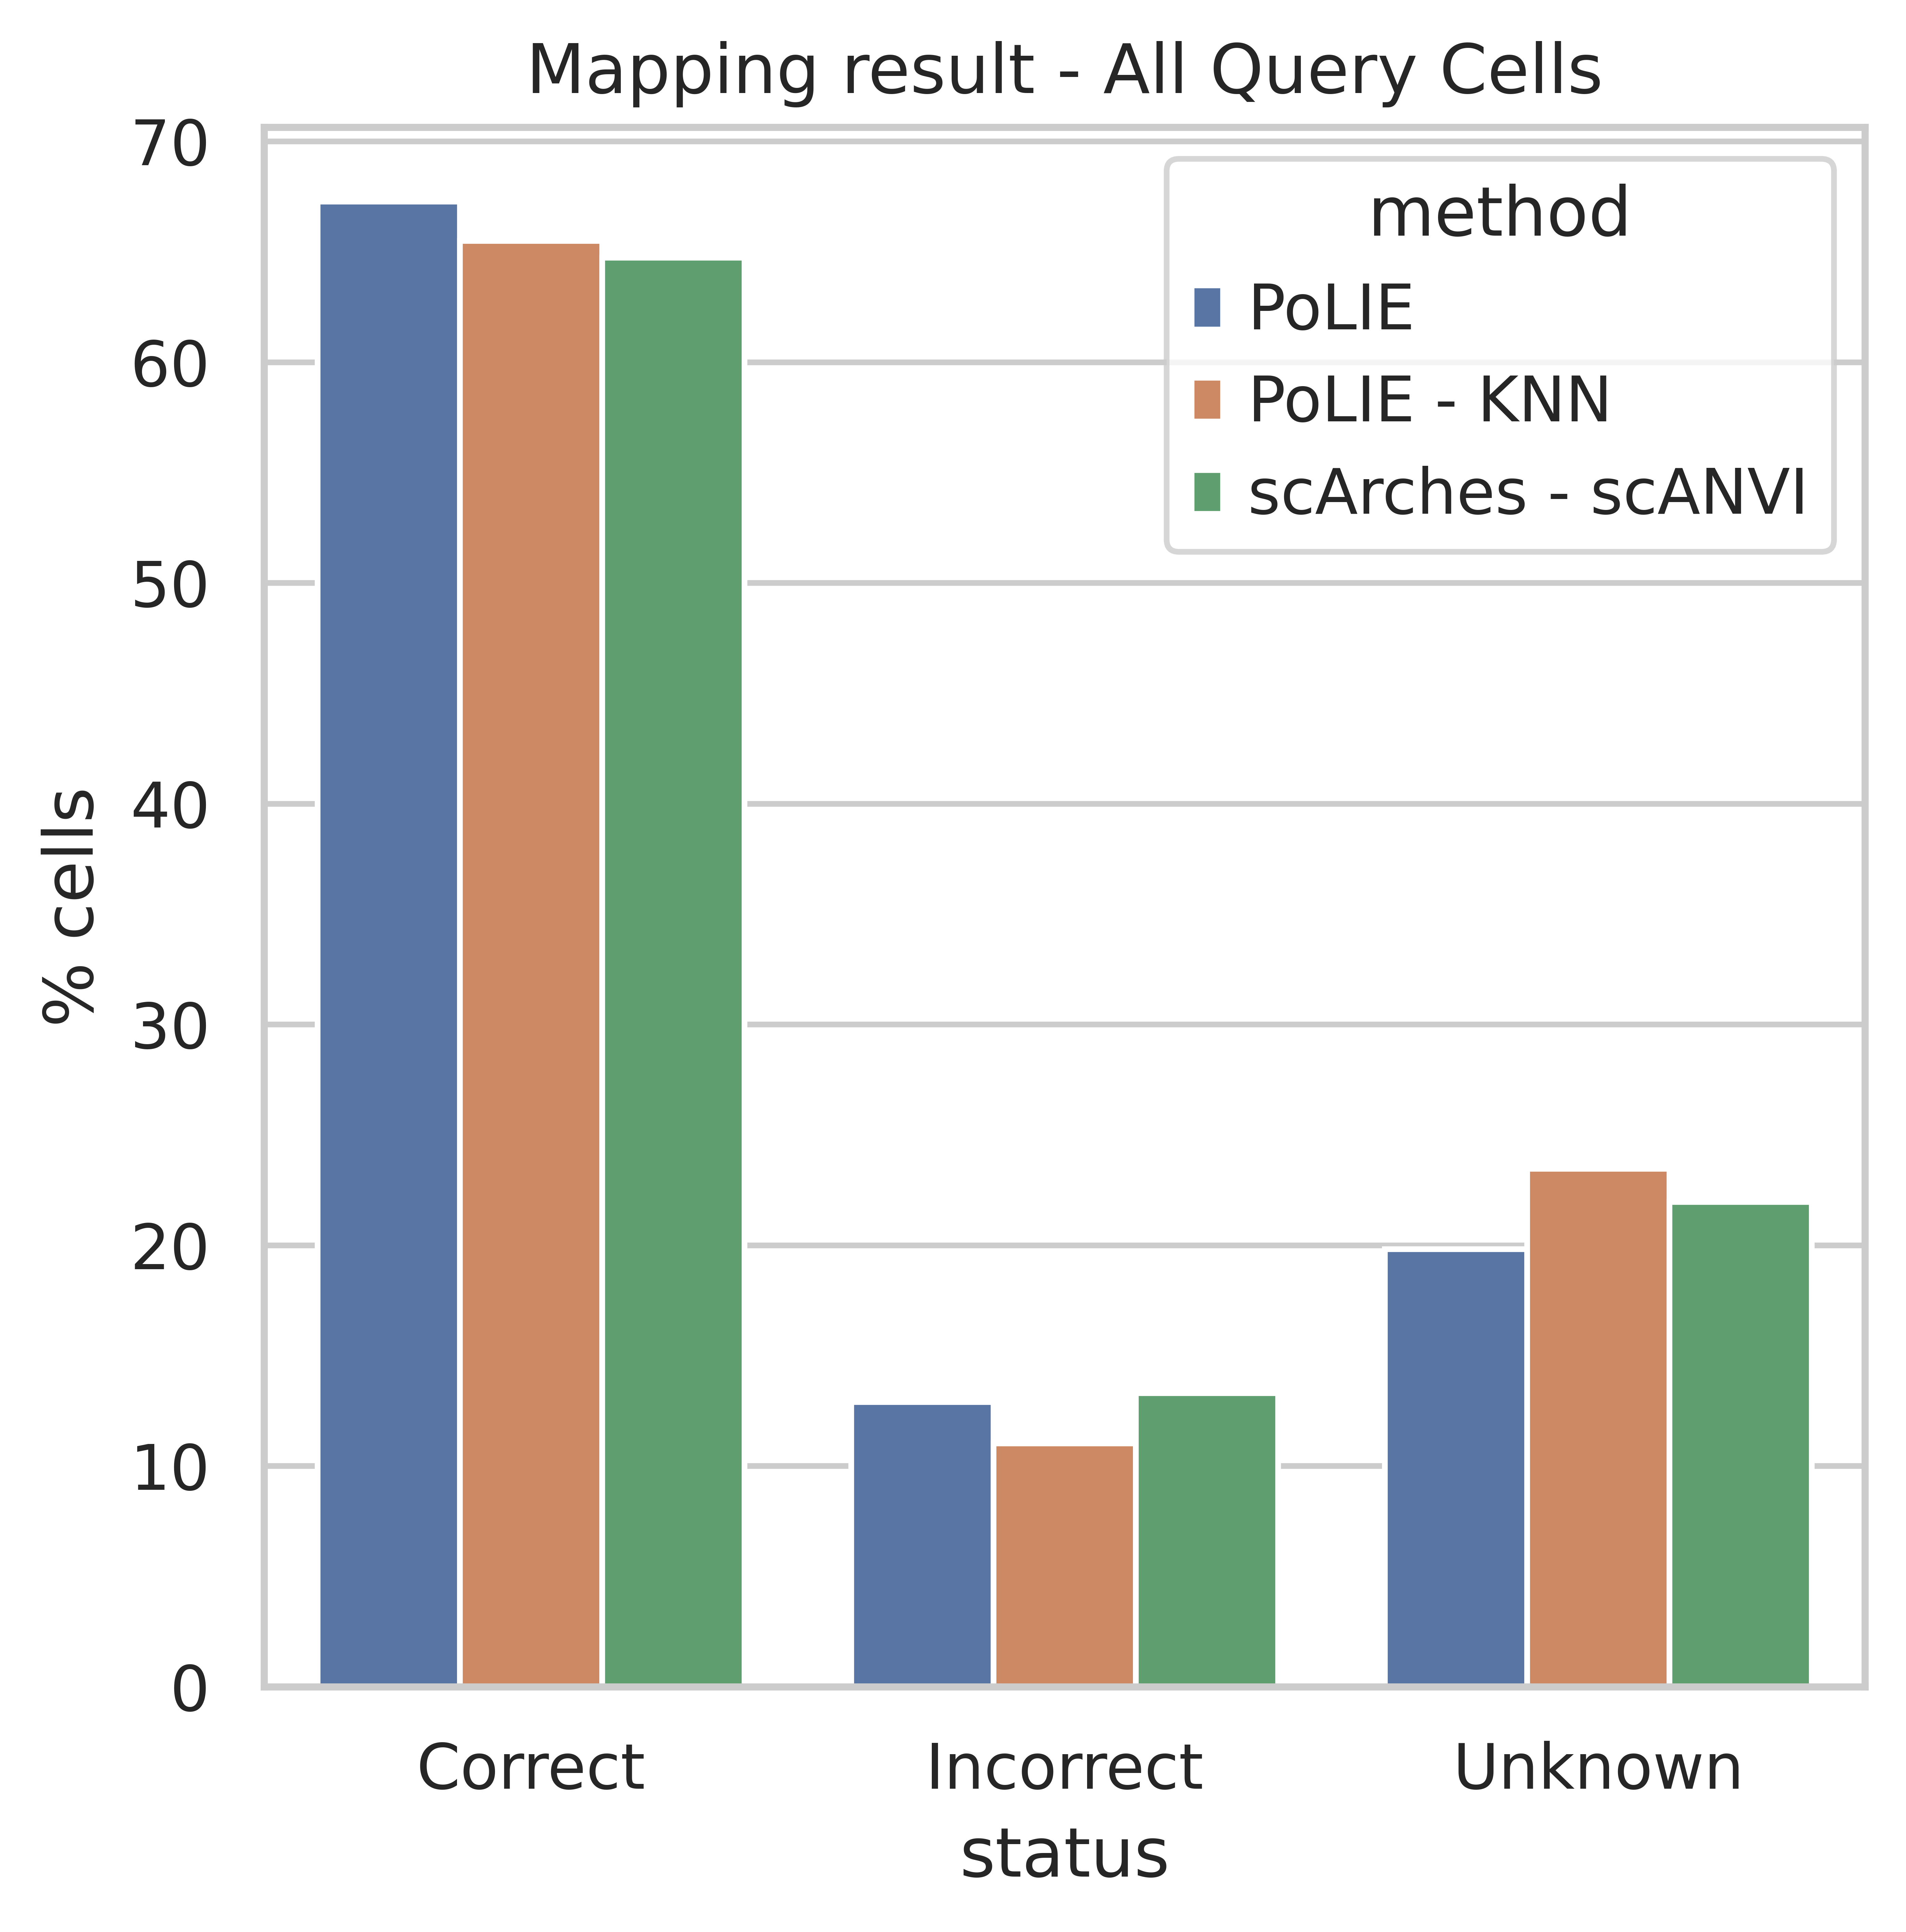

In [20]:
sns.set(rc={'figure.figsize':(5,5)})

with sns.axes_style("whitegrid"):
    summary_df = (
        label_transfer_all.groupby(['method', 'status']).agg({'pred': 'count'})
        / label_transfer_all.groupby(['method']).agg({'pred': 'count'})
        * 100
    ).reset_index()
    sns.barplot(x="status", y="pred", hue="method", data=summary_df)
    plt.ylabel('% cells')
    plt.title('Mapping result - All Query Cells')
    plt.show()